We will be using covid_19_india.csv covering data till April month for our visualization. So lets us load the data and take a glimpse at the information available

- Sno = Serial Number
- Date = Date of recording the Covid 19 count (format DD/MM/YY)
- Time = Time of recording the Covid 19 count
- State/UnionTerritory = Contains the full name of the State or the Union Territory
- ConfirmedIndianNational = Confirmed Indian National having Covid 19 as of this date in a given State or Union Territory
- ConfirmedForeignNational = Confirmed Foreign National having Covid 19 as of this date in a given State or Union Territory
- Cured = Count of Patient recovered or cured as of this date in a given State or Union Territory
- Deaths = Count of patient who have died as of this date in a given State or Union Territory
- Confirmed = Count of Total Patient having Covid 19 as of this date in a given State or Union Territory

In [1]:
# we will be using only the following columns 
# Date ,State/Union Territory & Confirmed Count

use_columns = ['Date' , 'State/UnionTerritory', 'Confirmed']

#importing data
import pandas as pd
df = pd.read_csv('covid_19_india.csv' , usecols = use_columns)

# Let us convert the date from String into YYYY-MM-DD format using pandas to_datetime function
df['Date'] =pd.to_datetime(df['Date'] , format='%d/%m/%y')

In [2]:
df

,Date,State/UnionTerritory,Confirmed
0,2020-01-30,Kerala,1
1,2020-01-31,Kerala,1
2,2020-02-01,Kerala,2
3,2020-02-02,Kerala,3
4,2020-02-03,Kerala,3
5,2020-02-04,Kerala,3
6,2020-02-05,Kerala,3
7,2020-02-06,Kerala,3
8,2020-02-07,Kerala,3
9,2020-02-08,Kerala,3


Taking the last date in the dataset as current date and plotting bar graph for the same.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

current_date = '2020-04-25'
df_final = (df[df['Date']==current_date]
       .sort_values(by='Confirmed', ascending=False)
       .head(10))
print(df_final)

           Date State/UnionTerritory  Confirmed
1304 2020-04-25          Maharashtra       6817
1295 2020-04-25              Gujarat       2815
1293 2020-04-25                Delhi       2514
1311 2020-04-25            Rajasthan       2034
1303 2020-04-25       Madhya Pradesh       1952
1316 2020-04-25        Uttar Pradesh       1778
1312 2020-04-25           Tamil Nadu       1755
1287 2020-04-25       Andhra Pradesh       1061
1313 2020-04-25            Telengana        984
1317 2020-04-25          West Bengal        571


<BarContainer object of 10 artists>

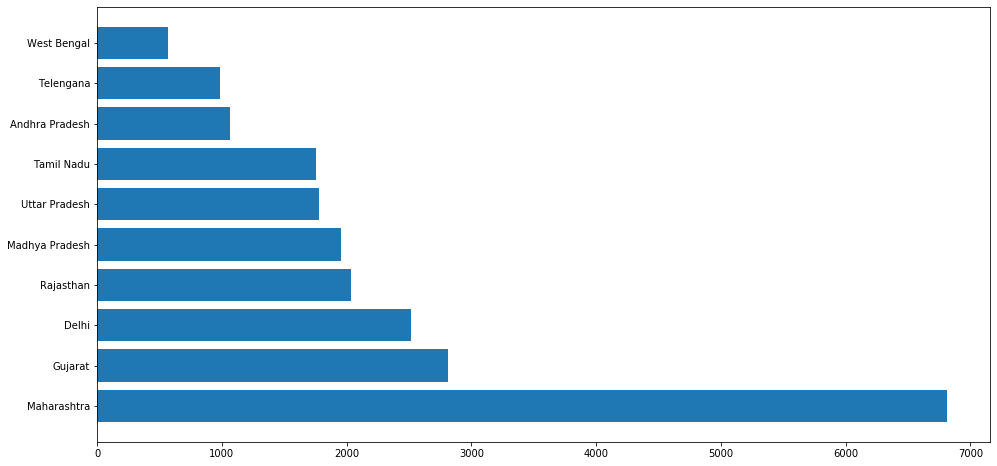

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(df_final['State/UnionTerritory'], df_final['Confirmed'])

Reversing the order of the bar garph

Text(1, 0.4, '2020-04-25')

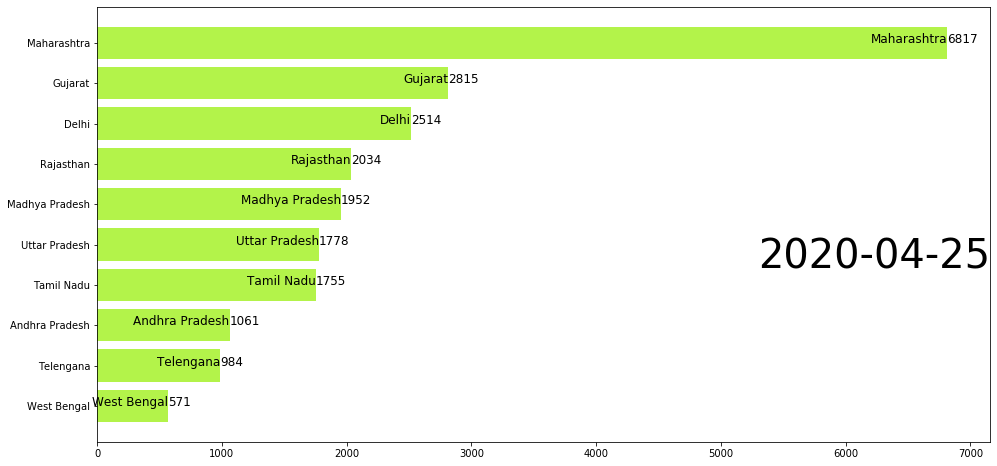

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))
df_final= df_final[::-1]   # States with highest count will be pushed down - so that it shows up in the graph

ax.barh(df_final['State/UnionTerritory'], df_final['Confirmed'] , color ='#B3F34A')

for i, (count, region) in enumerate(zip(df_final['Confirmed'], df_final['State/UnionTerritory'])):
    ax.text(count, i,     region,      size=12,      ha='right' )  # Maharashtra
    ax.text(count, i,     count,       size=12  ,  ha='left')   # 9915

ax.text(1, 0.4, current_date, transform=ax.transAxes, size=40, ha='right') # add the date 

Function for plotting the bar graph

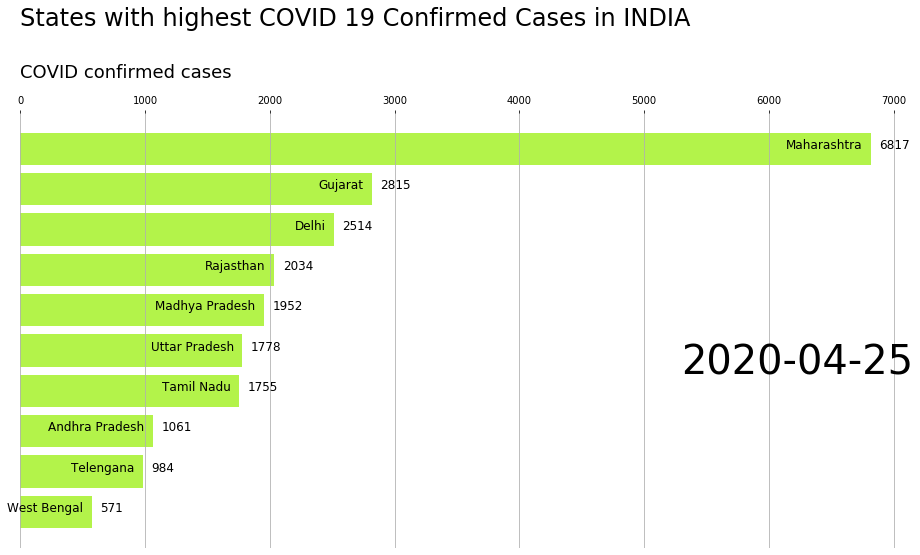

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))
def draw_horizontal_bar (date):
    ax.clear()  # this is important - as each function execution should run on fresh axis 
    df_final = (df[df['Date']==date].sort_values(by='Confirmed', ascending=False).head(10))
    df_final= df_final[::-1] # flip the values
    ax.barh(df_final['State/UnionTerritory'], df_final['Confirmed'] , color ='#B3F34A')
    filler = df_final['Confirmed'].max() /100 #  to add space between the States/UnionTerritory Name and the count
    
    for i, (count, region) in enumerate(zip(df_final['Confirmed'], df_final['State/UnionTerritory'])):
        ax.text(count -filler, i,     region,      size=12,  weight =400,    ha='right' )  # Maharashtra
        ax.text(count +filler , i,     count,       size=12  ,  ha='left')   # 9915

    ax.text(1, 0.4, date, transform=ax.transAxes, size=40, ha='right') # add the date 
    ax.text(0, 1.08, 'COVID confirmed cases', transform=ax.transAxes, size=18, color='black')
    ax.xaxis.set_ticks_position('top')
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_yticks([])
    ax.text(0, 1.20, 'States with highest COVID 19 Confirmed Cases in INDIA',
            transform=ax.transAxes, size=24,  ha='left')
    plt.box(False) # remove the box 
    

draw_horizontal_bar('2020-04-25')

Animated Bar plot

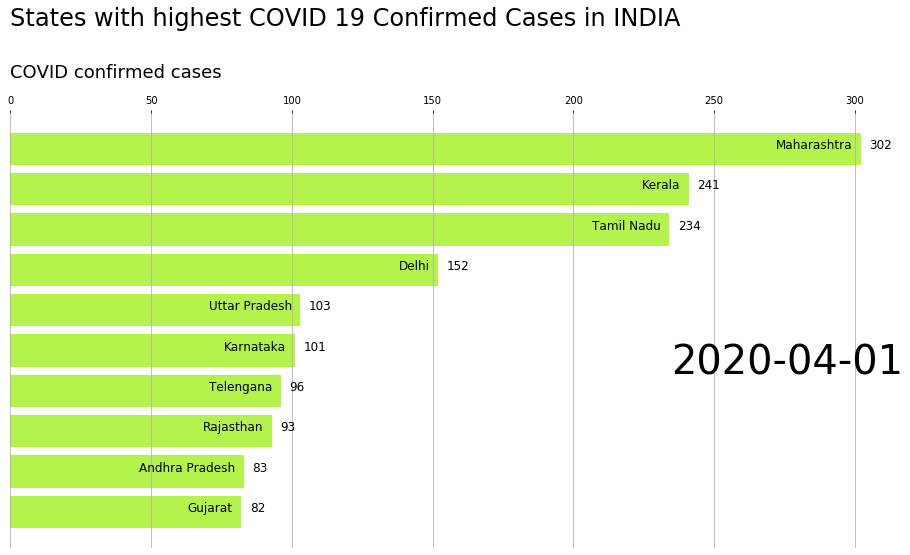

In [7]:
# Lets us get all the dates 

all_dates = df[df['Date'] >= '2020-04-01']['Date'].astype(str).to_list() # this is contain duplicates
dates = list(set(all_dates)) # we get uniques dates - but they are not sorted
dates = sorted(dates) # all dates arranged in order 

import matplotlib.animation as animation # import animation 
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(16, 8))
anim = animation.FuncAnimation(fig, draw_horizontal_bar, frames=dates) # this will call our 
# function for all the dates one by one
HTML(anim.to_jshtml()) 

Saving the image

PermissionError: [Errno 13] Permission denied: 'covid_india.gif'

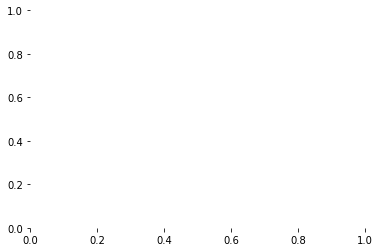

In [8]:
f = r"covid_india_confirmed.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

<img src="covid_india.gif" width="750" align="center">